In [1]:
# Computer Vision
# Assignment - 1
# Problem: Edge Detection


In [ ]:
# Canny Edge Detection (Code: CED): Implement Canny edge detection technique.
# The input image is lena.gif. (Marks 10)


In [2]:
# Required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import GifImagePlugin


In [3]:
# Required functions:
def plotting_image(image, information):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(information)
    plt.axis('off')


def function_for_nomalization(pixels):
    mini = pixels.min()
    maxi = pixels.max()
    pixels = pixels - mini
    pixels = pixels.astype(float)
    pixels *= (255/(maxi-mini))
    return pixels.astype(np.uint8)


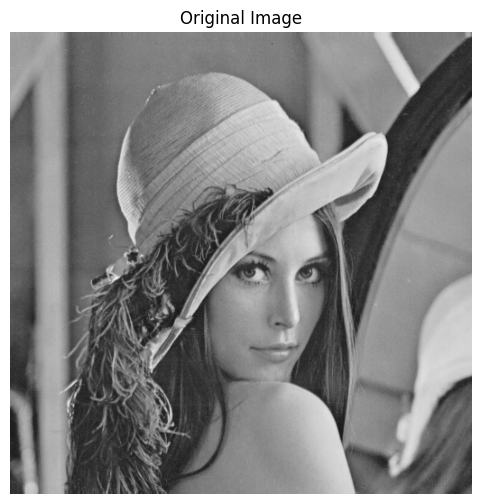

In [4]:
# Original Image:
# Read the image
original_image = Image.open("lena.gif")
plotting_image(original_image, "Original Image")


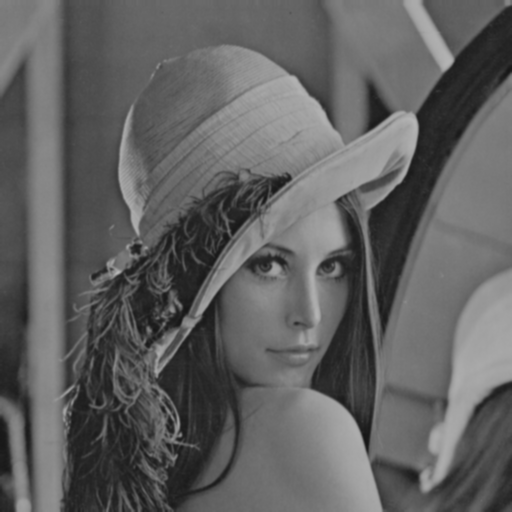

In [5]:
pixels = np.array(original_image)
# First stage of Gaussian filter:
kernel_array = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
gaussian_image = cv2.filter2D(pixels, -1, kernel_array)
display(Image.fromarray(gaussian_image))


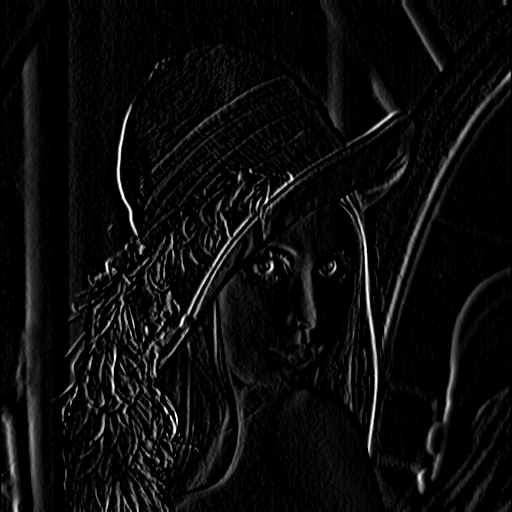

In [6]:
# Dervative fo x and y:
# for x:
kernel_array = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
derivative_x_axis = cv2.filter2D(gaussian_image, -1, kernel_array)
x_derivative_axis = function_for_nomalization(derivative_x_axis)
display(Image.fromarray(x_derivative_axis))


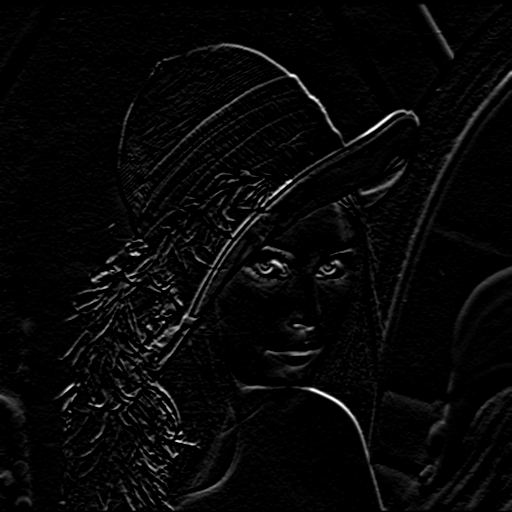

In [7]:
# for y:
kernel_array = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
derivative_y_axis = cv2.filter2D(gaussian_image, -1, kernel_array)
y_derivative = function_for_nomalization(derivative_y_axis)
display(Image.fromarray(y_derivative))


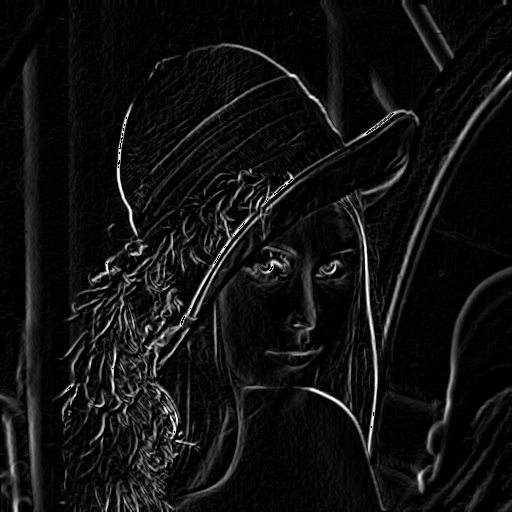

In [8]:
# Magnitude
magnitude = np.hypot(x_derivative_axis, y_derivative).astype(np.uint8)
display(Image.fromarray(magnitude))


In [9]:
# Gradeint Matrix:
gradient_matrix = np.degrees(np.arctan2(y_derivative, x_derivative_axis))


In [10]:
# Non maximum suppression:
def non_maximum_supression(mag_grad, grad):
    non_max_sup = np.zeros(mag_grad.shape)

# Looking Each and every pixel
    for i in range(1, int(mag_grad.shape[0]) - 1):
        for j in range(1, int(mag_grad.shape[1]) - 1):

            # For grad Direction in entire space, if gradient direction is less we will compare the pixel.
            if ((grad[i, j] >= -22.5 and grad[i, j] <= 22.5) or (grad[i, j] <= -157.5 and grad[i, j] >= 157.5)):
                if ((mag_grad[i, j] > mag_grad[i, j+1]) and (mag_grad[i, j] > mag_grad[i, j-1])):
                    non_max_sup[i, j] = mag_grad[i, j]
                else:
                    non_max_sup[i, j] = 0
            if ((grad[i, j] >= 22.5 and grad[i, j] <= 67.5) or (grad[i, j] <= -112.5 and grad[i, j] >= -157.5)):
                if ((mag_grad[i, j] > mag_grad[i+1, j+1]) and (mag_grad[i, j] > mag_grad[i-1, j-1])):
                    non_max_sup[i, j] = mag_grad[i, j]
                else:
                    non_max_sup[i, j] = 0
            if ((grad[i, j] >= 67.5 and grad[i, j] <= 112.5) or (grad[i, j] <= -67.5 and grad[i, j] >= -112.5)):
                if ((mag_grad[i, j] > mag_grad[i+1, j]) and (mag_grad[i, j] > mag_grad[i-1, j])):
                    non_max_sup[i, j] = mag_grad[i, j]
                else:
                    non_max_sup[i, j] = 0
            if ((grad[i, j] >= 112.5 and grad[i, j] <= 157.5) or (grad[i, j] <= -22.5 and grad[i, j] >= -67.5)):
                if ((mag_grad[i, j] > mag_grad[i+1, j-1]) and (mag_grad[i, j] > mag_grad[i-1, j+1])):
                    non_max_sup[i, j] = mag_grad[i, j]
                else:
                    non_max_sup[i, j] = 0

    return non_max_sup


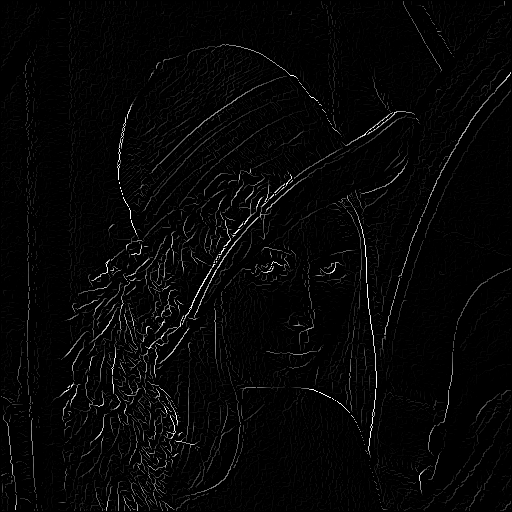

In [11]:
# Original image of non maximum suppression:
non_max_sup = non_maximum_supression(magnitude, gradient_matrix)
non_max_sup = function_for_nomalization(non_max_sup)
display(Image.fromarray(non_max_sup))


In [12]:
# Removing the unwanted edges:
def Threshold(img):

    # Setting up the low and high treshhold values
    ratio_high_threshold = 0.32
    ratio_low_threshold = 0.30
    sup = np.copy(img)

#Height and Width
    h = int(sup.shape[0])
    w = int(sup.shape[1])
    high_threshold = np.max(sup) * ratio_high_threshold
    low_threshold = high_threshold * ratio_low_threshold
    for i in range(1, h-1):
        # Pixels under consideration are having high treshhold we will mark it as 1
        for j in range(1, w-1):
            if (sup[i, j] > high_threshold):
                sup[i, j] = 255

# Pixels under consideration are having Low treshhold we will mark it as 0
            elif (sup[i, j] < low_threshold):
                sup[i, j] = 0

# Pixels under consideration are having any surrounding pixels with intensity having higher than the treshhold we will mark it as 1
            else:
                if ((sup[i-1, j-1] > high_threshold) or
                    (sup[i-1, j] > high_threshold) or
                    (sup[i-1, j+1] > high_threshold) or
                    (sup[i, j-1] > high_threshold) or
                    (sup[i, j+1] > high_threshold) or
                    (sup[i+1, j-1] > high_threshold) or
                    (sup[i+1, j] > high_threshold) or
                        (sup[i+1, j+1] > high_threshold)):
                    sup[i, j] = 255

# Converting an Image into Binary Image.
    sup = (sup == 255) * sup
    return sup


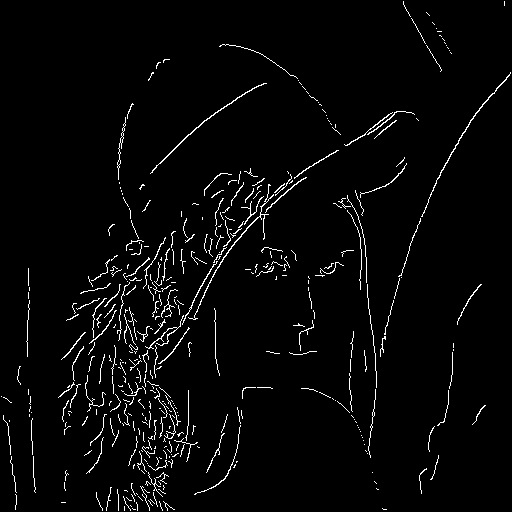

True

In [13]:
# Final Image:
Final_image = Threshold(non_max_sup)
display(Image.fromarray(Final_image))
cv2.imwrite('S20200010212_CED_output.jpg', Final_image)
